In [1]:
import pandas as pd  
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_mar_17 = pd.read_csv('/dbfs/FileStore/tables/PRED_31MAR17.csv')
df_mar_17 = df_mar_17.drop_duplicates().reset_index(drop = True)

df_jun_17 = pd.read_csv('/dbfs/FileStore/tables/PRED_30JUN17.csv')
df_jun_17 = df_jun_17.drop_duplicates().reset_index(drop = True)

df_oct_17 = pd.read_csv('/dbfs/FileStore/tables/PRED_31OCT17.csv')
df_oct_17 = df_oct_17.drop_duplicates().reset_index(drop = True)

df_dec_17 = pd.read_csv('/dbfs/FileStore/tables/PRED_31DEC17.csv')
df_dec_17 = df_dec_17.drop_duplicates().reset_index(drop = True)

df_mar_18 = pd.read_csv('/dbfs/FileStore/tables/PRED_31MAR18.csv')
df_mar_18 = df_mar_18.drop_duplicates().reset_index(drop = True)

df_jun_18 = pd.read_csv('/dbfs/FileStore/tables/PRED_30JUN18.csv')
df_jun_18 = df_jun_18.drop_duplicates().reset_index(drop = True)

df_oct_18 = pd.read_csv('/dbfs/FileStore/tables/PRED_31OCT18.csv')
df_oct_18 = df_oct_18.drop_duplicates().reset_index(drop = True)

df_dec_18 = pd.read_csv('/dbfs/FileStore/tables/PRED_31DEC18.csv')
df_dec_18 = df_dec_18.drop_duplicates().reset_index(drop = True)

df_mar_19 = pd.read_csv('/dbfs/FileStore/tables/PRED_MARR19.csv')
df_mar_19 = df_mar_19.drop_duplicates().reset_index(drop = True)


/databricks/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
 interactivity=interactivity, compiler=compiler, result=result)
/databricks/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23,34) have mixed types. Specify dtype option on import or set low_memory=False.
 interactivity=interactivity, compiler=compiler, result=result)
/databricks/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
 interactivity=interactivity, compiler=compiler, result=result)

In [3]:
df_mar_17['HIRE_EXIT_DATE'] = pd.to_datetime(df_mar_17['HIRE_EXIT_DATE'], dayfirst = True)
df_jun_17['HIRE_EXIT_DATE'] = pd.to_datetime(df_jun_17['HIRE_EXIT_DATE'], dayfirst = True)
df_oct_17['HIRE_EXIT_DATE'] = pd.to_datetime(df_oct_17['HIRE_EXIT_DATE'], dayfirst = True)
df_dec_17['HIRE_EXIT_DATE'] = pd.to_datetime(df_dec_17['HIRE_EXIT_DATE'], dayfirst = True)
df_mar_18['HIRE_EXIT_DATE'] = pd.to_datetime(df_mar_18['HIRE_EXIT_DATE'], dayfirst = True)
df_jun_18['HIRE_EXIT_DATE'] = pd.to_datetime(df_jun_18['HIRE_EXIT_DATE'], dayfirst = True)
df_oct_18['HIRE_EXIT_DATE'] = pd.to_datetime(df_oct_18['HIRE_EXIT_DATE'], dayfirst = True)
df_dec_18['HIRE_EXIT_DATE'] = pd.to_datetime(df_dec_18['HIRE_EXIT_DATE'], dayfirst = True)
df_mar_19['HIRE_EXIT_DATE'] = pd.to_datetime(df_mar_19['HIRE_EXIT_DATE'], dayfirst = True)

quarter_dict = {3: 1, 6: 2, 10: 3, 12: 4} # quarter dict

df_mar_17['Year'] = df_mar_17[df_mar_17['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_mar_17['Quarter'] = pd.Series(df_mar_17[df_mar_17['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

df_jun_17['Year'] = df_jun_17[df_jun_17['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_jun_17['Quarter'] = pd.Series(df_jun_17[df_jun_17['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

df_oct_17['Year'] = df_oct_17[df_oct_17['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_oct_17['Quarter'] = pd.Series(df_oct_17[df_oct_17['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

df_dec_17['Year'] = df_dec_17[df_dec_17['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_dec_17['Quarter'] = pd.Series(df_dec_17[df_dec_17['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

df_mar_18['Year'] = df_mar_18[df_mar_18['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_mar_18['Quarter'] = pd.Series(df_mar_18[df_mar_18['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

df_jun_18['Year'] = df_jun_18[df_jun_18['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_jun_18['Quarter'] = pd.Series(df_jun_18[df_jun_18['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

df_oct_18['Year'] = df_oct_18[df_oct_18['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_oct_18['Quarter'] = pd.Series(df_oct_18[df_oct_18['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

df_dec_18['Year'] = df_dec_18[df_dec_18['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_dec_18['Quarter'] = pd.Series(df_dec_18[df_dec_18['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

df_mar_19['Year'] = df_mar_19[df_mar_19['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().year
df_mar_19['Quarter'] = pd.Series(df_mar_19[df_mar_19['EMP_STATUS'] == 'I']['HIRE_EXIT_DATE'].max().month).apply(quarter_dict.get)[0]

In [4]:
df_mar_17_A = df_mar_17[df_mar_17['EMP_STATUS'] == 'A']
df_jun_17_A = df_jun_17[df_jun_17['EMP_STATUS'] == 'A']
df_oct_17_A = df_oct_17[df_oct_17['EMP_STATUS'] == 'A']
df_dec_17_A = df_dec_17[df_dec_17['EMP_STATUS'] == 'A']
df_mar_18_A = df_mar_18[df_mar_18['EMP_STATUS'] == 'A']
df_jun_18_A = df_jun_18[df_jun_18['EMP_STATUS'] == 'A']
df_oct_18_A = df_oct_18[df_oct_18['EMP_STATUS'] == 'A']
df_dec_18_A = df_dec_18[df_dec_18['EMP_STATUS'] == 'A']
df_mar_19_A = df_mar_19[df_mar_19['EMP_STATUS'] == 'A']

df_mar_17_I = df_mar_17[df_mar_17['EMP_STATUS'] == 'I']
df_jun_17_I = df_jun_17[df_jun_17['EMP_STATUS'] == 'I']
df_oct_17_I = df_oct_17[df_oct_17['EMP_STATUS'] == 'I']
df_dec_17_I = df_dec_17[df_dec_17['EMP_STATUS'] == 'I']
df_mar_18_I = df_mar_18[df_mar_18['EMP_STATUS'] == 'I']
df_jun_18_I = df_jun_18[df_jun_18['EMP_STATUS'] == 'I']
df_oct_18_I = df_oct_18[df_oct_18['EMP_STATUS'] == 'I']
df_dec_18_I = df_dec_18[df_dec_18['EMP_STATUS'] == 'I']
df_mar_19_I = df_mar_19[df_mar_19['EMP_STATUS'] == 'I']

In [5]:
df_mar_17_target = df_mar_17_A.merge(df_jun_17_I[['MASK_EMPLOYEEID', 'EMP_STATUS']], on = ['MASK_EMPLOYEEID'], how = 'left')
df_mar_17_target.rename(columns = {'EMP_STATUS_y': 'Target'}, inplace = True)
df_mar_17_target['Target'] = df_mar_17_target['Target'].fillna('A')

df_jun_17_target = df_jun_17_A.merge(df_oct_17_I[['MASK_EMPLOYEEID', 'EMP_STATUS']], on = ['MASK_EMPLOYEEID'], how = 'left')
df_jun_17_target.rename(columns = {'EMP_STATUS_y': 'Target'}, inplace = True)
df_jun_17_target['Target'] = df_jun_17_target['Target'].fillna('A')

df_oct_17_target = df_oct_17_A.merge(df_dec_17_I[['MASK_EMPLOYEEID', 'EMP_STATUS']], on = ['MASK_EMPLOYEEID'], how = 'left')
df_oct_17_target.rename(columns = {'EMP_STATUS_y': 'Target'}, inplace = True)
df_oct_17_target['Target'] = df_oct_17_target['Target'].fillna('A')

df_dec_17_target = df_dec_17_A.merge(df_mar_18_I[['MASK_EMPLOYEEID', 'EMP_STATUS']], on = ['MASK_EMPLOYEEID'], how = 'left')
df_dec_17_target.rename(columns = {'EMP_STATUS_y': 'Target'}, inplace = True)
df_dec_17_target['Target'] = df_dec_17_target['Target'].fillna('A')

df_mar_18_target = df_mar_18_A.merge(df_jun_18_I[['MASK_EMPLOYEEID', 'EMP_STATUS']], on = ['MASK_EMPLOYEEID'], how = 'left')
df_mar_18_target.rename(columns = {'EMP_STATUS_y': 'Target'}, inplace = True)
df_mar_18_target['Target'] = df_mar_18_target['Target'].fillna('A')

df_jun_18_target = df_jun_18_A.merge(df_oct_18_I[['MASK_EMPLOYEEID', 'EMP_STATUS']], on = ['MASK_EMPLOYEEID'], how = 'left')
df_jun_18_target.rename(columns = {'EMP_STATUS_y': 'Target'}, inplace = True)
df_jun_18_target['Target'] = df_jun_18_target['Target'].fillna('A')

df_oct_18_target = df_oct_18_A.merge(df_dec_18_I[['MASK_EMPLOYEEID', 'EMP_STATUS']], on = ['MASK_EMPLOYEEID'], how = 'left')
df_oct_18_target.rename(columns = {'EMP_STATUS_y': 'Target'}, inplace = True)
df_oct_18_target['Target'] = df_oct_18_target['Target'].fillna('A')

df_dec_18_target = df_dec_18_A.merge(df_mar_19_I[['MASK_EMPLOYEEID', 'EMP_STATUS']], on = ['MASK_EMPLOYEEID'], how = 'left')
df_dec_18_target.rename(columns = {'EMP_STATUS_y': 'Target'}, inplace = True)
df_dec_18_target['Target'] = df_dec_18_target['Target'].fillna('A')

In [6]:
final_df = pd.concat([df_mar_17_target, df_jun_17_target], axis = 0)
final_df = pd.concat([final_df, df_oct_17_target], axis = 0)
final_df = pd.concat([final_df, df_dec_17_target], axis = 0)
final_df = pd.concat([final_df, df_mar_18_target], axis = 0)
final_df = pd.concat([final_df, df_jun_18_target], axis = 0)
final_df = pd.concat([final_df, df_oct_18_target], axis = 0)
final_df = pd.concat([final_df, df_dec_18_target], axis = 0)
final_df = pd.concat([final_df, df_mar_19_A], axis = 0)

/local_disk0/tmp/1564120635658-0/PythonShell.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

 import signal

In [7]:
df_mar_19_A.shape

Out[7]: (47905, 39)

In [8]:
feature_df = final_df[['MASK_EMPLOYEEID', 'EMPLOYEE_AGE', 'GENDER', 'TOTAL_REPORTEES', 'BAND', 'DEPARTMENT_ID', 'NO_OF_MANAGER_REPORTEES',
         'TECHM_EXPERIENCE', 'TOTAL_EXPERIENCE', 'LAST_HIKE_PERCENT', 'MANAGER_RATING', 'NO_OF_PREVIOUS_EMPLOYERS', 'TENURE_LAST_EMPLOPYER', 
         'HIGHEST_EDUCATION', 'QUARTILE', 'LAST_PROMOTION_DATE', 'TOTAL_PROMOTIONS', 'MANAGER_LAST_PROMOTION', 'REWARDS', 'PRIMARY_SKILL', 
         'SECONDARY_SKILL', 'BASE_LOCATION_CITY', 'CURRENT_LOCATION_CITY','HIRE_LOCATION_CITY', 'RESIGNATION_FLG', 'BILLABILITY_STATUS', 
         'CURRENT_RATING', 'LAST_RATING', 'ALL_PREVIOUS_RAINGS', 'LATEST_HIKE_PERCENT', 'OFFICERCODE_DESC', 'GRIEVANCE_FLG', 
         'HIRE_EXIT_DATE', 'Year', 'Quarter', 'Target', 'NO_OF_LEAVES']]

In [9]:
# Filling null values in rating
feature_df['ALL_PREVIOUS_RAINGS'] = feature_df['ALL_PREVIOUS_RAINGS'].astype(str)
feature_df['ALL_PREVIOUS_RAINGS'] = np.where(feature_df['ALL_PREVIOUS_RAINGS'] != 'nan', feature_df['ALL_PREVIOUS_RAINGS'].apply(lambda x : x[-1]), feature_df['ALL_PREVIOUS_RAINGS'])

feature_df['CURRENT_RATING'] = np.where(feature_df['CURRENT_RATING'].isnull(), feature_df['LAST_RATING'], feature_df['CURRENT_RATING'])
feature_df['CURRENT_RATING'] = np.where(feature_df['CURRENT_RATING'].isnull(), feature_df['ALL_PREVIOUS_RAINGS'], feature_df['CURRENT_RATING'])

# Promotion in last one year
feature_df['LAST_PROMOTION_DATE'] = pd.to_datetime(feature_df['LAST_PROMOTION_DATE'], dayfirst = True)
invt_quarter_dict = {1: '03', 2: '06', 3: '10', 4: '12'}
feature_df['Month'] = feature_df['Quarter'].apply(invt_quarter_dict.get)
feature_df['Pr_Date'] = feature_df.apply(lambda x: str(x['Year']) + "-" + x['Month'] + "-" + '30', axis = 1)
feature_df['Pr_Date'] = pd.to_datetime(feature_df['Pr_Date'], dayfirst = True)

feature_df['Recent_year_promotion'] = feature_df.apply(lambda feature_df : 1 if feature_df.LAST_PROMOTION_DATE >= feature_df['Pr_Date'] - timedelta(days = 365) and feature_df.LAST_PROMOTION_DATE <= feature_df['Pr_Date'] else 0,axis=1)


/local_disk0/tmp/1564120635658-0/PythonShell.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from __future__ import print_function
/local_disk0/tmp/1564120635658-0/PythonShell.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 
/local_disk0/tmp/1564120635658-0/PythonShell.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import linecache
/local_disk0/tmp/1564120635658-0/PythonShell.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import os
/local_disk0/tmp/1564120635658-0/PythonShell.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import six.moves.queue
/local_disk0/tmp/1564120635658-0/PythonShell.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import six
/local_disk0/tmp/1564120635658-0/PythonShell.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import sys
/local_disk0/tmp/1564120635658-0/PythonShell.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import time
/local_disk0/tmp/1564120635658-0/PythonShell.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [10]:
feature_df = feature_df[feature_df['EMPLOYEE_AGE'].notnull()]
feature_df['LAST_HIKE_PERCENT'] = feature_df['LAST_HIKE_PERCENT'].fillna(-1)
feature_df['HIGHEST_EDUCATION'] = feature_df['HIGHEST_EDUCATION'].fillna('GRADUATE')
feature_df['PRIMARY_SKILL'] = feature_df['PRIMARY_SKILL'].fillna('NA')
feature_df.loc[feature_df['CURRENT_RATING'] == 'nan', 'CURRENT_RATING'] = 'NA'
feature_df['MANAGER_RATING'] = feature_df['MANAGER_RATING'].fillna('NA')
feature_df['GRIEVANCE_FLG'] = feature_df['GRIEVANCE_FLG'].fillna('NA')

In [11]:
gender_dict = {'M': 0, 'F': 1}
rating_dict = {'X': 1, 'C': 2, 'E': 3, 'L': 4, 'NA': -1}
band_dict =  {'RG1': -1 ,'RG2': -2, 'EVP': 1, 'E3': 2, 'E2': 3, 'E1': 4, 'P2': 5,  'P1': 6, 'U4': 7, 'U3': 8, 'U2': 9, 'U1': 10}
education_dict =  {'OTHERS':-1,'DIPLOMA':0,'PROFESSIONAL':3,'GRADUATE':1,'POST_GRADUATE':2,'Doctorate_Degree':4}
edu_name = {'BE/BTech/BScTech':'GRADUATE', 'DIPLOMA':'DIPLOMA','Company Secretery':'PROFESSIONAL','Others':'OTHERS','MCA':'POST_GRADUATE','BCS':'GRADUATE','PGDM/PGDBM':'DIPLOMA','BA/BCom':'GRADUATE','PGDCA/PGDIT/PGDCSA':'POST_GRADUATE','ICWA':'GRADUATE','B Pharm':'GRADUATE','M Pharm':'POST_GRADUATE','MMS':'POST_GRADUATE',' ' :'GRADUATE','SSC / HSC':'POST_GRADUATE','BSc':'GRADUATE','MSc': 'POST_GRADUATE' ,'MBA':'POST_GRADUATE','BCA':'GRADUATE','ME/Mtech/MS/MIT/MSwSys/MInfoSc':'POST_GRADUATE', 'GRADUATE': 'GRADUATE', 'BE/BTech/BScTech/BIT/BArch':'GRADUATE','BBA/BBM':'GRADUATE','CA':'POST_GRADUATE','Bachelor of Law':'GRADUATE','MA/MCom':'POST_GRADUATE','Management Graduate':'GRADUATE','nan':'GRADUATE','D- Post Graduate':'POST_GRADUATE','MPM':'POST_GRADUATE','PhD/MPhil':'Doctorate_Degree','MCM/MCS':'POST_GRADUATE','ME/MTech/MS':'POST_GRADUATE','E- Doctoral':'Doctorate_Degree'}
generic_dict = {'Y': 1, 'N': 0, 'NA': -1, 'T': -1}
target_dict = {'I': 1, 'A': 0}

In [12]:
feature_df['Education'] = feature_df['HIGHEST_EDUCATION'].apply(edu_name.get).apply(education_dict.get)
feature_df['BAND'] = feature_df['BAND'].apply(band_dict.get)
feature_df['MANAGER_RATING'] = feature_df['MANAGER_RATING'].apply(rating_dict.get)
feature_df['CURRENT_RATING'] = feature_df['CURRENT_RATING'].apply(rating_dict.get)
feature_df['GENDER'] = feature_df['GENDER'].apply(gender_dict.get)
feature_df['GRIEVANCE_FLG'] = feature_df['GRIEVANCE_FLG'].apply(generic_dict.get)
feature_df['BILLABILITY_STATUS'] = feature_df['BILLABILITY_STATUS'].apply(generic_dict.get)
feature_df['RESIGNATION_FLG'] = feature_df['RESIGNATION_FLG'].apply(generic_dict.get)
feature_df['Target'] = feature_df['Target'].apply(target_dict.get)

In [13]:
le = LabelEncoder()
feature_df['PRIMARY_SKILL'] = le.fit_transform(feature_df['PRIMARY_SKILL'])
feature_df['DEPARTMENT_ID'] = le.fit_transform(feature_df['DEPARTMENT_ID'])
feature_df['OFFICERCODE_DESC'] = le.fit_transform(feature_df['OFFICERCODE_DESC'])

In [14]:
feature_df['HIRE_LOCATION_CITY'] = feature_df['HIRE_LOCATION_CITY'].str.lower()
feature_df['CURRENT_LOCATION_CITY'] = feature_df['CURRENT_LOCATION_CITY'].str.lower()
feature_df['Location_Flag'] = np.where(feature_df['HIRE_LOCATION_CITY'] == feature_df['CURRENT_LOCATION_CITY'], 1, 0)

In [15]:
# feature_df['year_quarter'] = feature_df.apply(lambda x: str(x['Year']) + str(x['Quarter']), axis = 1)

In [16]:
feature_df.sort_values(by = ['MASK_EMPLOYEEID', 'Year', 'Quarter'], ascending = True, inplace = True)
feature_df_last = feature_df.groupby('MASK_EMPLOYEEID').last().reset_index()

feature_df_last['con_string'] = feature_df_last.apply(lambda x: str(x['MASK_EMPLOYEEID']) + str(x['Year']) + str(x['Quarter']), axis= 1)
feature_df['con_string'] = feature_df.apply(lambda x: str(x['MASK_EMPLOYEEID']) + str(x['Year']) + str(x['Quarter']), axis= 1)

feature_df_update = feature_df[~feature_df['con_string'].isin(feature_df_last['con_string'].tolist())]
user_leave_mean = feature_df_update.groupby('MASK_EMPLOYEEID').agg({'NO_OF_LEAVES': 'mean'}).reset_index()

feature_df['MASK_EMPLOYEEID'] = feature_df['MASK_EMPLOYEEID'].astype(str)
user_leave_mean['MASK_EMPLOYEEID'] = user_leave_mean['MASK_EMPLOYEEID'].astype(str)

feature_df = feature_df.merge(user_leave_mean, on = ['MASK_EMPLOYEEID'], how = 'left')
feature_df.rename(columns = {'NO_OF_LEAVES_y': 'Avg_leaves'}, inplace = True)
feature_df['Avg_leaves'] = feature_df['Avg_leaves'].fillna(-1)

In [17]:
val_set_1 = feature_df[feature_df['Pr_Date'] == '2018-12-30']
val_set_2 = feature_df[feature_df['Pr_Date'] == '2019-03-30']
val_set_1.shape, val_set_2.shape

Out[16]: ((48193, 44), (47903, 44))

In [18]:
train_test_data = feature_df[~feature_df['Pr_Date'].isin(['2018-12-30', '2019-03-30'])] # seprating validation set from feature set
feature_to_use = train_test_data[['EMPLOYEE_AGE', 'GENDER', 'TOTAL_REPORTEES', 'BAND',
       'DEPARTMENT_ID', 'NO_OF_MANAGER_REPORTEES', 'TECHM_EXPERIENCE',
       'TOTAL_EXPERIENCE', 'LAST_HIKE_PERCENT', 'MANAGER_RATING',
       'NO_OF_PREVIOUS_EMPLOYERS', 'TENURE_LAST_EMPLOPYER',
       'QUARTILE', 'TOTAL_PROMOTIONS', 'REWARDS',
       'PRIMARY_SKILL', 'BILLABILITY_STATUS', 'CURRENT_RATING', 'LATEST_HIKE_PERCENT', 'OFFICERCODE_DESC',
       'GRIEVANCE_FLG', 'Target', 'Recent_year_promotion', 'Education', 'Location_Flag', 'Pr_Date', 'Quarter', 'Avg_leaves']]

In [19]:
train_test_data.shape, feature_df.shape, val_set_1.shape

Out[18]: ((358863, 44), (454959, 44), (48193, 44))

In [20]:
df = spark.createDataFrame(feature_to_use)

display(df)

EMPLOYEE_AGE,GENDER,TOTAL_REPORTEES,BAND,DEPARTMENT_ID,NO_OF_MANAGER_REPORTEES,TECHM_EXPERIENCE,TOTAL_EXPERIENCE,LAST_HIKE_PERCENT,MANAGER_RATING,NO_OF_PREVIOUS_EMPLOYERS,TENURE_LAST_EMPLOPYER,QUARTILE,TOTAL_PROMOTIONS,REWARDS,PRIMARY_SKILL,BILLABILITY_STATUS,CURRENT_RATING,LATEST_HIKE_PERCENT,OFFICERCODE_DESC,GRIEVANCE_FLG,Target,Recent_year_promotion,Education,Location_Flag,Pr_Date,Quarter,Avg_leaves
35.0,0,0,7,24,24,3.8,11.7,0.0,-1,3,0.76,0,0,2,841,0,2,3.0,11,0,0.0,0,1,1,2018-10-30T00:00:00.000+0000,3,0.0
37.0,0,15,6,87,38,2.0,11.3,0.0,1,4,4.62,0,0,2,1803,1,2,0.0,11,0,0.0,0,1,1,2017-03-30T00:00:00.000+0000,1,11.0
37.0,0,13,6,207,25,2.2,11.5,0.0,1,4,4.62,0,0,2,30,1,2,0.0,11,0,0.0,0,1,1,2017-06-30T00:00:00.000+0000,2,11.0
37.0,0,0,6,21,16,2.6,11.8,0.0,-1,4,4.62,0,0,2,30,0,2,0.0,11,0,0.0,0,1,1,2017-10-30T00:00:00.000+0000,3,11.0
37.0,0,0,6,21,75,2.7,12.0,0.0,-1,4,4.62,0,0,2,30,0,2,0.0,11,0,0.0,0,1,1,2017-12-30T00:00:00.000+0000,4,11.0
38.0,0,0,6,21,33,3.0,12.3,0.0,-1,4,4.62,0,0,2,30,0,2,0.0,11,0,0.0,0,1,1,2018-03-30T00:00:00.000+0000,1,11.0
38.0,0,0,6,342,67,3.2,12.5,0.0,-1,4,4.62,0,0,2,30,1,2,3.0,11,0,0.0,0,1,1,2018-06-30T00:00:00.000+0000,2,11.0
38.0,0,7,6,342,73,3.6,12.8,0.0,-1,4,4.62,0,0,2,30,0,2,3.0,11,0,0.0,0,1,1,2018-10-30T00:00:00.000+0000,3,11.0
33.0,1,0,8,268,9,0.3,5.2,-1.0,-1,5,1.79,4,0,0,530,1,-1,0.0,11,-1,0.0,0,2,1,2017-10-30T00:00:00.000+0000,3,9.666666666666666
33.0,1,0,8,268,10,0.5,5.4,-1.0,-1,5,1.79,4,0,0,530,1,-1,0.0,11,-1,0.0,0,2,1,2017-12-30T00:00:00.000+0000,4,9.666666666666666


In [21]:
feature_to_use = feature_to_use[~((feature_to_use['Target'] == 0) & (feature_to_use['Pr_Date'].isin(['2017-03-30', '2017-06-30'])))]
del feature_to_use['Pr_Date']

In [22]:
feature_to_use.shape

Out[21]: (252508, 27)

In [23]:
feature_set = feature_to_use.copy(deep = True)
del feature_set['Target']
target_set = feature_to_use['Target']

In [24]:
scaler = StandardScaler()
scaler.fit(feature_set)
x = scaler.transform(feature_set)
feature_set = pd.DataFrame(x, columns = feature_set.columns)
# target_set = pd.Series(scaler.fit_transform(target_set))

/databricks/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
 return self.partial_fit(X, y)
/local_disk0/tmp/1564120635658-0/PythonShell.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size=0.20, random_state=42)

In [26]:
X_train.shape, X_test.shape

Out[25]: ((202006, 26), (50502, 26))

In [27]:
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train, y_train)
# print(classification_report(y_test, svc.predict(X_test)))

In [28]:
clf = MLPClassifier(activation='relu', 
     				beta_1=0.6, 
     				beta_2=0.9,
                    alpha = 0.001,
                    early_stopping = True,
                    shuffle = True,
                    warm_start = True,
                    validation_fraction = 0.3,
     				learning_rate_init=0.01, 
     				max_iter = 1000, momentum = 0.8, 
     				random_state = 42, solver = 'sgd',
     				learning_rate='adaptive') #, max_iter=1000
# clf = LogisticRegression()
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

precision recall f1-score support

 0.0 0.96 0.99 0.97 46705
 1.0 0.75 0.49 0.59 3797

 micro avg 0.95 0.95 0.95 50502
 macro avg 0.85 0.74 0.78 50502
weighted avg 0.94 0.95 0.94 50502

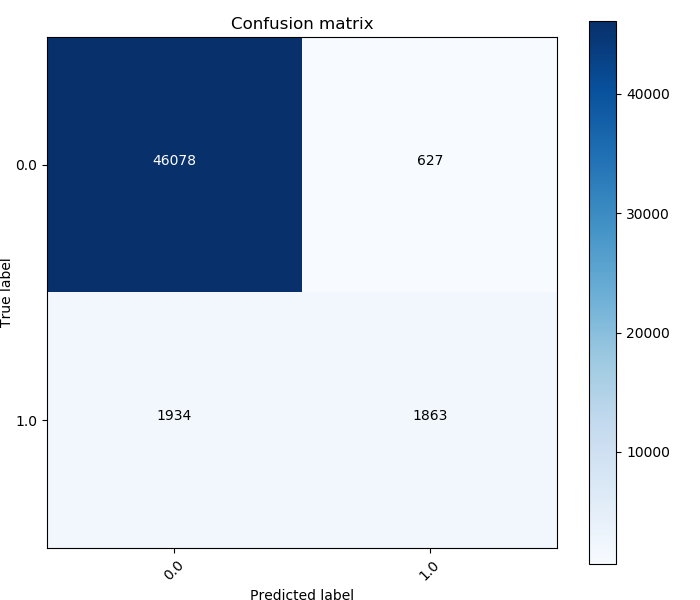

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', rotation= 90, labelpad = 1)
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_predict=pd.DataFrame(clf.predict(X_test))

cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
plt.figure(figsize=(7, 6))
(plot_confusion_matrix(cnf_matrix, classes=np.unique(y_predict),
                      title='Confusion matrix'))

plt.show()
display()

In [30]:
# set(X_train.columns) - set(val_set_1.columns), set(val_feature.columns) - set(X_train.columns)
print(classification_report(y_test, clf.predict_proba(X_test)[:,1] >= 0.49))

precision recall f1-score support

 0.0 0.96 0.99 0.97 46705
 1.0 0.74 0.50 0.60 3797

 micro avg 0.95 0.95 0.95 50502
 macro avg 0.85 0.74 0.78 50502
weighted avg 0.94 0.95 0.94 50502

In [31]:
val_feature = val_set_1.copy(deep = True)
val_feature = val_feature[['EMPLOYEE_AGE', 'GENDER', 'TOTAL_REPORTEES', 'BAND', 'DEPARTMENT_ID',
       'NO_OF_MANAGER_REPORTEES', 'TECHM_EXPERIENCE', 'TOTAL_EXPERIENCE',
       'LAST_HIKE_PERCENT', 'MANAGER_RATING', 'NO_OF_PREVIOUS_EMPLOYERS',
       'TENURE_LAST_EMPLOPYER', 'QUARTILE', 'TOTAL_PROMOTIONS', 'REWARDS',
       'PRIMARY_SKILL', 'BILLABILITY_STATUS', 'CURRENT_RATING',
       'LATEST_HIKE_PERCENT', 'OFFICERCODE_DESC', 'GRIEVANCE_FLG',
       'Recent_year_promotion', 'Education', 'Location_Flag', 'Quarter',
       'Avg_leaves', 'Target']]
del val_feature['Target']
val_target = val_set_1['Target']
x = scaler.transform(val_feature)
val_feature = pd.DataFrame(x, columns = val_feature.columns)

/local_disk0/tmp/1564120635658-0/PythonShell.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
 import sys

In [32]:
val_feature.shape

Out[29]: (48193, 26)

In [33]:
print(classification_report(val_target, clf.predict(val_feature)))

precision recall f1-score support

 0.0 0.95 1.00 0.97 45687
 1.0 0.85 0.01 0.01 2506

 micro avg 0.95 0.95 0.95 48193
 macro avg 0.90 0.50 0.49 48193
weighted avg 0.94 0.95 0.92 48193

In [34]:
print(classification_report(val_target, clf.predict_proba(val_feature)[:,1] >= 0.15))

precision recall f1-score support

 0.0 0.97 1.00 0.98 45687
 1.0 0.82 0.35 0.49 2506

 micro avg 0.96 0.96 0.96 48193
 macro avg 0.89 0.67 0.73 48193
weighted avg 0.96 0.96 0.95 48193

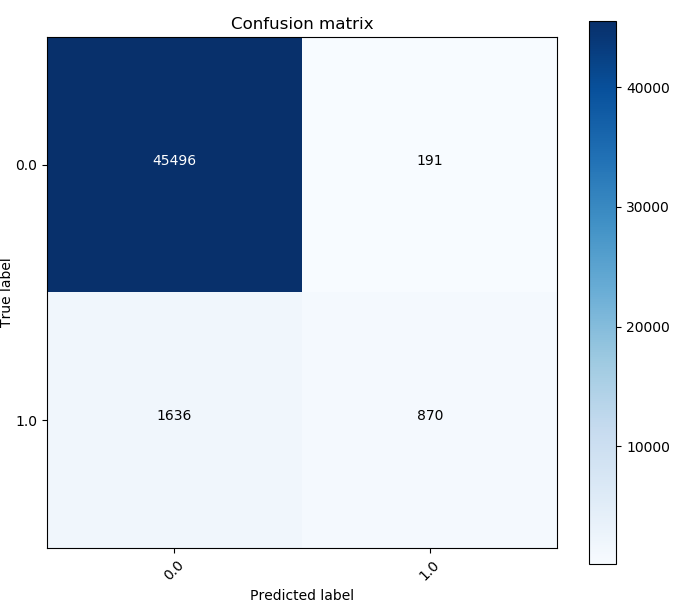

In [35]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', rotation= 90, labelpad = 1)
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_predict=pd.DataFrame(clf.predict(X_test))

cnf_matrix = confusion_matrix(val_target , clf.predict_proba(val_feature)[:,1] >= 0.15)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# plt.figure()
plt.figure(figsize=(7, 6))
(plot_confusion_matrix(cnf_matrix, classes=np.unique(y_predict),
                      title='Confusion matrix'))

plt.show()
display()

In [36]:
val_feature_2 = val_set_2.copy(deep = True)
val_feature_2 = val_feature_2[['EMPLOYEE_AGE', 'GENDER', 'TOTAL_REPORTEES', 'BAND', 'DEPARTMENT_ID',
       'NO_OF_MANAGER_REPORTEES', 'TECHM_EXPERIENCE', 'TOTAL_EXPERIENCE',
       'LAST_HIKE_PERCENT', 'MANAGER_RATING', 'NO_OF_PREVIOUS_EMPLOYERS',
       'TENURE_LAST_EMPLOPYER', 'QUARTILE', 'TOTAL_PROMOTIONS', 'REWARDS',
       'PRIMARY_SKILL', 'BILLABILITY_STATUS', 'CURRENT_RATING',
       'LATEST_HIKE_PERCENT', 'OFFICERCODE_DESC', 'GRIEVANCE_FLG',
       'Recent_year_promotion', 'Education', 'Location_Flag', 'Quarter',
       'Avg_leaves', 'Target']]
del val_feature_2['Target']
val_target = val_set_2['Target']
x = scaler.transform(val_feature_2)
val_feature_2 = pd.DataFrame(x, columns = val_feature_2.columns)

/local_disk0/tmp/1563943758501-0/PythonShell.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
 import sys

In [37]:
val_set_2['Prediction'] = clf.predict_proba(val_feature_2)[:,1]

val_set_2['Predicted_Target'] = np.where(val_set_2['Prediction'] >= 0.50, 'High Risk', np.where(((val_set_2['Prediction'] < 0.50) & (val_set_2['Prediction'] >= 0.15)), 'Medium Risk', 'Low Risk'))

/local_disk0/tmp/1563943758501-0/PythonShell.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from __future__ import absolute_import
/local_disk0/tmp/1563943758501-0/PythonShell.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [38]:
val_set_2.shape, val_feature_2.shape

Out[104]: ((47903, 46), (47903, 26))

In [39]:
val_set_2['Predicted_Target'].value_counts(dropna = False)

Out[105]: Low Risk 41196
Medium Risk 3625
High Risk 3082
Name: Predicted_Target, dtype: int64

In [40]:
val_set_2[['MASK_EMPLOYEEID', 'Predicted_Target']].isnull().sum()

Out[106]: MASK_EMPLOYEEID 0
Predicted_Target 0
dtype: int64

In [41]:
df2 = val_set_2[['MASK_EMPLOYEEID', 'Predicted_Target']]

display(df2)

MASK_EMPLOYEEID,Predicted_Target
000079CBB635D543,Low Risk
00032030A84EAD76,Low Risk
0003D84D69BA0596,Medium Risk
0007C4578BF23AFF,Low Risk
0008FF8BCA5B84A8,Low Risk
000C4A453BA81B78,Low Risk
000C89CB1110EE17,Low Risk
000F915471527BB5,Low Risk
0011410806E93007,Low Risk
0011EC4A4CCBB7DB,Medium Risk


In [42]:
val_feature_2.columns

Out[312]: Index(['EMPLOYEE_AGE', 'GENDER', 'TOTAL_REPORTEES', 'BAND', 'DEPARTMENT_ID',
 'NO_OF_MANAGER_REPORTEES', 'TECHM_EXPERIENCE', 'TOTAL_EXPERIENCE',
 'LAST_HIKE_PERCENT', 'MANAGER_RATING', 'NO_OF_PREVIOUS_EMPLOYERS',
 'TENURE_LAST_EMPLOPYER', 'QUARTILE', 'TOTAL_PROMOTIONS', 'REWARDS',
 'PRIMARY_SKILL', 'BILLABILITY_STATUS', 'CURRENT_RATING',
 'LATEST_HIKE_PERCENT', 'OFFICERCODE_DESC', 'GRIEVANCE_FLG',
 'Recent_year_promotion', 'Education', 'Location_Flag', 'Quarter',
 'Avg_leaves', 'Prediction', 'Predicted_Target'],
 dtype='object')